# UTSA CS 3793/5233: Assignment-3

Summer 2021


**Frank - Tyler - (zaf455)**






## Learning Objectives

Implement 2 different machine learning algorithms
*   Stochastic Gradient Descent
*   ID3 Decision Tree



## Description

This assignment is focused on **machine learning**, mainly on the implementation of 2 different algorithms - Stochastic Gradient Descent & ID3 decision tree. 
The assignment is divided into two sections, each for one unique ML algorithm. 

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library that contains the implementation of ML algorithms. You can get pieces of code from online, but please cite the source properly.


##Import Libraries

Write all the import statements here. This should be for both algorithm implmentations. As mentioned before, you can not use any premade ML libraries.

In [ ]:
# import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import dot
import math
from sklearn.metrics import mean_squared_error
from google.colab import drive
drive.mount('/content/drive')

import operator


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"

#Stochastic Gradient Descent

In this section, you will implement the Stochastic Gradient Descent algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that you are given **all binary-valued attributes** and that there are **no missing values** in the train or test data. 


##Algorithm

(50 points)

Following are the data files that will be provided to you for the gradient descent algorithm implementation.

*   Training file - 'gd-train.dat'
*   Testing file - 'gd-test.dat'

*Both these files should be present in the same folder as this code file.* In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are different example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments.



In [ ]:
# Data file name variables
train = basePath + "gd-train.dat"
test = basePath + "gd-test.dat"


In [ ]:
# Read the training and testing data files
# df_train = pd.read_csv(train)
# df_test = pd.read_csv(test)
df_train = pd.read_table(train)
df_test= pd.read_table(test)

print('Training Cols')
# print(df_train.columns)
print(df_train.head(10))
print('\nTesting Cols')
print(df_test.head(10))

# rs = df_train.sample(100)
# f, ax = plt.subplots(figsize = (15,10))
# plt.rc('font', size=18)
# ax.set_xlabel("A1")
# ax.set_ylabel("C")
# ax.xaxis.label.set_color('black')
# ax.yaxis.label.set_color('black')
# ax.tick_params(colors='black')
# plt.scatter(x=rs.A1, y=rs.C, color='blue')

Training Cols
   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  A11  A12  A13  C
0   1   1   1   1   0   0   1   1   0    0    0    1    1  0
1   0   0   0   1   0   0   1   1   0    1    0    0    1  0
2   0   1   1   1   0   1   1   1   1    0    0    0    1  0
3   0   1   1   0   1   0   1   1   1    0    1    0    1  0
4   0   1   0   0   0   1   0   1   0    1    0    0    1  0
5   0   1   1   0   0   1   1   1   1    1    1    0    1  0
6   0   1   1   1   0   0   1   1   0    0    0    1    1  0
7   0   1   0   0   1   0   0   1   1    0    1    1    1  0
8   1   1   1   1   0   0   1   1   0    0    0    0    1  0
9   1   0   1   1   1   1   1   0   0    0    0    0    1  0

Testing Cols
   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  A11  A12  A13  C
0   1   1   0   0   0   0   0   0   1    1    0    0    1  0
1   0   0   1   1   0   1   1   0   0    0    0    0    1  0
2   0   1   0   1   1   0   1   0   1    1    1    0    1  1
3   0   0   1   0   0   1   0   1   0    1    1    1    1

In [ ]:
# Activation Function - implement Sigmoid
# S(z) = 1.0 / (1 + (e**(-z)))
# Source: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

def activation_function(h):
    # given 'h' compute and return 'z' based on the activation function implemented
    z = 1.0 / (1 + np.exp(-h))
    # print('activation_function returning: ' + str(z)) #-debug
    return z

In [ ]:
# Train the model using the given training dataset and the learning rate
# return the "weights" learnt for the perceptron - include the weight assocaited with bias as the last entry
# def train(train_data, learning_rate=0.05):
def train(train_data, learning_rate):
    countCorrect = 0
    # initialize weights to 0
    weights = [0] * 13
    b = weights[0]
    # print(weights) #-debug
    # print(str(len(train_data)))#-debug
    count = 0 #-debug
    # go through each training data instance
    for index, x in df_train.iterrows():
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        # print('index: ' + str(index))#-debug
        # print('x: ' + str(x))#-debug
        y = x[13]
        # print(str(mvX) + ' gtcl:' + str(gtcl)) #-debug
        # obtain h(x)
        ## h(x) = (w[0]*x[0] + w[1]*x[1] + ... + w[12]*x[12]) + b
        h = 0
        idx = 0
        while idx < 13:
            debug1 = x[idx]
            h += weights[idx] * x[idx]
            # print(h)
            idx += 1
        # h += b # ignoring for now
        # print('h:' + str(h)) #-debug
        # call the activation function with 'h' as parameter to obtain 'z'
        # print('h:' + str(h)) #-debug
        z = activation_function(h)
        classification = GetClassification(z)
        if classification == y:
            countCorrect += 1
        # print('z: ' + str(z)) #-debug
        # update all weights individually using learning_rate, (y-z), and the corresponding 'x'
        j = 0
        while j < 13:
            # print('w[j]:' + str(weights[j]) + ' + learning rate:' + str(learning_rate) + '* (y-z): ' + str(y-z) + ' * x[j]: ' + str(x[j]))#-debug
            weights[j] = weights[j] + learning_rate * (y - z) * x[j]

            # print(weights) #-debug
            j += 1
        # print() #-debug
        count += 1 #-debug
    # return the final learnt weights
    acc = countCorrect / len(train_data)
    # print('returning weights: ' + str(weights))
    return weights, acc  ## need to add weight associated with bias as last entry

In [ ]:
# Best way to iterate through dataframes in pandas - for future study
# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
# https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6

In [ ]:
# Test the model (weights learnt) using the given test dataset
# return the accuracy value
def test(test_data, weights, threshold):
    countCorrect = 0
    # go through each training data instance
    for index, x in test_data.iterrows():
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        y = x[13]
        # obtain h(x)
        h = 0
        idx = 0
        while idx < 13:
            h += weights[idx] * x[idx]
            # print(h)
            idx += 1
        # call the activation function with 'h' as parameter to obtain 'z'
        z = activation_function(h)
        # use 'threshold' to convert 'z' to either 0 or 1 so as to match to the ground truth binary labels
        classification = GetClassification(z)
        # compare the normalized 'z' with 'y' to calculate the positive and negative instances for calculating accuracy
        if classification == y:
            countCorrect += 1
    # return the accuracy value for the given test dataset
    accuracyVal = countCorrect / len(test_data)
    return accuracyVal

In [ ]:
# Gradient Descent function
def gradient_descent(df_train, df_test, learning_rate, threshold=0.5):
    # call the train function to train the model and obtain the weights
    learntWeights, accuracyValTrain = train(df_train, learning_rate)
    accuracyValTrain = accuracyValTest = test(df_train, learntWeights, 0.5)
    # call the test function with the training dataset to obtain the training accuracy
    # accuracyValTrain = test(train, learntWeights, 0.5)
    # call the test function with the testing dataset to obtain the testing accuracy
    accuracyValTest = test(df_test, learntWeights, 0.5)
    # return (trainAccuracy, testAccuracy)
    return (accuracyValTrain, accuracyValTest)
    

In [ ]:
# Threshold of 0.5 will be used to classify the instance for the test. If the value is >= 0.5, classify as 1 or else 0.
threshold = 0.5
def GetClassification(value):
  if value >= 0.5:
    return 1
  if value < 0.5:
    return 0


In [ ]:
# Main algorithm loop
# Loop through all the different learning rates [0.05, 1]
    # For each learning rate selected, call the gradient descent function to obtain the train and test accuracy values
    # Print both the accuracy values as "Accuracy for LR of 0.1 on Training set = x %" OR "Accuracy for LR of 0.1 on Testing set = x %"
# learnRates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
plotX = []
trainAccY = []
testAccY = []
learnRates = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
for lr in learnRates:
  accTrain, accTest = gradient_descent(df_train, df_test, lr)
  plotX.append(lr)
  testAccY.append(accTest)
  trainAccY.append(accTrain)
  print('Accurracy for LR of ' + str(lr) + ' on Training set = '+ str(accTrain * 100) + '%')
  print('Accurracy for LR of ' + str(lr) + ' on Testing set = '+ str(accTest * 100) + '%')
  print()

Accurracy for LR of 0.05 on Training set = 68.0%
Accurracy for LR of 0.05 on Testing set = 72.25%

Accurracy for LR of 0.1 on Training set = 68.0%
Accurracy for LR of 0.1 on Testing set = 71.75%

Accurracy for LR of 0.15 on Training set = 69.0%
Accurracy for LR of 0.15 on Testing set = 71.75%

Accurracy for LR of 0.2 on Training set = 69.0%
Accurracy for LR of 0.2 on Testing set = 71.5%

Accurracy for LR of 0.25 on Training set = 69.0%
Accurracy for LR of 0.25 on Testing set = 71.0%

Accurracy for LR of 0.3 on Training set = 69.0%
Accurracy for LR of 0.3 on Testing set = 70.75%

Accurracy for LR of 0.35 on Training set = 70.0%
Accurracy for LR of 0.35 on Testing set = 70.0%

Accurracy for LR of 0.4 on Training set = 70.0%
Accurracy for LR of 0.4 on Testing set = 69.0%

Accurracy for LR of 0.45 on Training set = 69.0%
Accurracy for LR of 0.45 on Testing set = 68.5%

Accurracy for LR of 0.5 on Training set = 69.0%
Accurracy for LR of 0.5 on Testing set = 68.25%

Accurracy for LR of 0.55 

##Extra Credit - Accuracy Plots

(05 points)

Use the above accuracy results on the training and testing data and write code to plot the graphs as mentioned in the code block below.



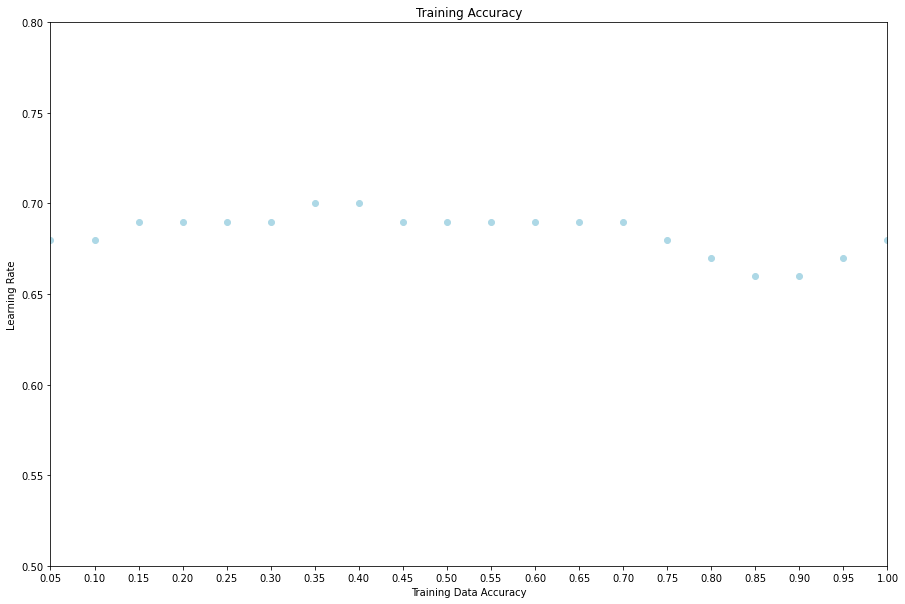

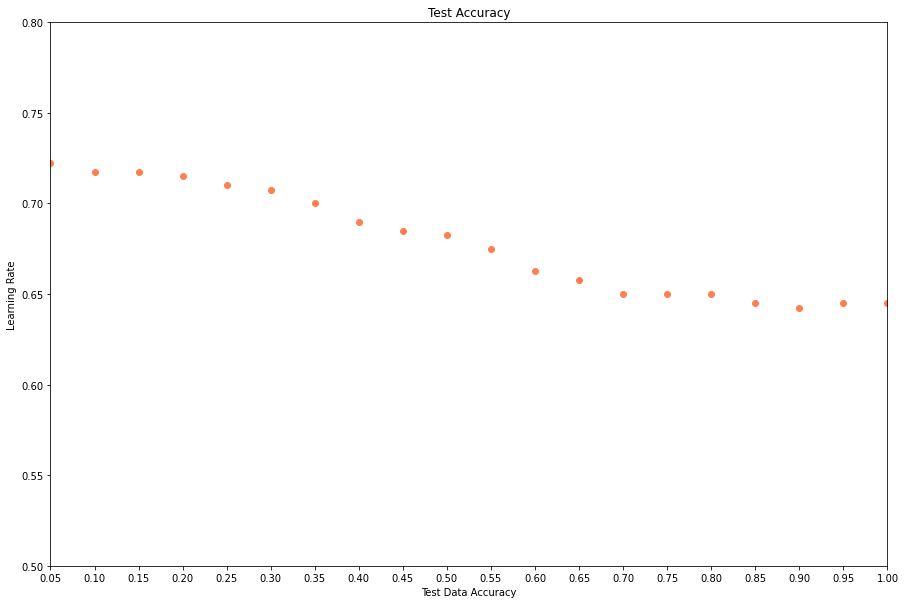

In [ ]:
# Plot the graphs for accuracy results.
# plotX = []
# trainAccY = []
# testAccY = []
# There will be 2 graphs - one for training data and the other for testing data
# For each graph,
    # X-axis will be the learning rate going from 0.05-1 in increments on 0.05
    # Y-axis will be the accuracy values at the selected learning rate.
plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(plotX, trainAccY, c='lightblue')
plt.xlabel('Training Data Accuracy')
plt.ylabel('Learning Rate')
plt.title('Training Accuracy')
plt.axis([0.05, 1, 0.5, 0.8])
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
plt.show()

plt.scatter(plotX, testAccY, c='coral')
plt.xlabel('Test Data Accuracy')
plt.ylabel('Learning Rate')
plt.title('Test Accuracy')
plt.axis([0.05, 1, 0.5, 0.8])
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
plt.show()


#ID3 Decision Tree

In this section, you will implement the ID3 Decision Tree algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that you are given **all binary-valued attributes** and that there are **no missing values** in the train or test data. 


## Algorithm

(100 points)

Following are the data files that will be provided to you for the ID3 algorithm implementation.

*   Training file - 'id3-train.dat'
*   Testing file - 'id3-test.dat'

*Both these files should be present in the same folder as this code file.* In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

In a decision tree, if you reach a leaf node but still have examples that belong to different classes, then choose the most frequent class (among the instances at the leaf node). If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes, then choose the class that is most frequent in the entire training set. You do not need to implement pruning. Also, don’t forget to use logarithm base 2 when computing entropy and set (0 log 0) to 0.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments. The code should output the following 3 things:

*   Print the Decision Tree created, in the following example format:

    ```
    attr1 = 0 :
        attr2 = 0 :
            attr3 = 0 : 1
            attr3 = 1 : 0
        attr3 = 1 :
            attr4 = 0 : 0
            attr4 = 1 : 1
    attr1 = 1 :
        attr2 = 1 : 1

    ```

*   Accuracy on the Training data = x %
*   Accuracy on the Test data = x %





In [ ]:
# Data file name variables
train = basePath + "id3-train.dat"
test = basePath + "id3-test.dat"

class Node(object):
    def __init__(self, parent):
        self.parent = parent
        self.children = []
        self.splitAttribute = None
        self.splitAttributeValue = None
        self.count = None
        self.cls = None
        self.prediction = None
        self.isLeafNode = False
        # self.entropy = entropy

In [ ]:
# Pseudocode for the ID3 algorithm. Use this to create function(s).
# def ID3(data, root, attributesRemaining):
def ID3(orig_data, curr_data, root, attributesRemaining, classif):
    # get the total entropy for this dataset, used to get IG
    total_entropy = GetEntropyForAllData(curr_data, classif)
    # print('total_entropy= ' + str(total_entropy) + ' for dataset: \n' + str(curr_data))#-debug
    root.entropy = total_entropy
    # check1, check1OccurrenceCount = np.unique(curr_data[classif], return_counts=True)
    origVals, origOccur = np.unique(orig_data[classif], return_counts=True)
    areEquallySplit = True
    # if origVals[0] != origVals[1]:
    if len(origVals) != 1:
        areEquallySplit = False
    # If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes
    if attributesRemaining == [] or areEquallySplit: # or something***************
    #     # Choose and the class that is most frequent in the entire training set and return the updated tree
        i = 0
        prev = 0
        saveIdx = 0
        while i < len(origVals) - 1:
            if origOccur[i] > prev:
                prev = origOccur[i]
                saveIdx = i
            i += 1

        # root.splitAttributeValue = origVals[saveIdx]
        root.prediction = origVals[saveIdx]
        root.isLeafNode = True
        return root

    # # If all the instances have only one class label
    check2 = np.unique(curr_data[classif])
    if len(check2) == 1:
        # Make this as the leaf node and use the label as the class value of the node and return the updated tree
        root.splitAttribute = check2[0]
        root.isLeafNode = True
        root.prediction = check2[0]
        # print('all rows in this dataset are the same classification')
    #     return root
        return root
    check3, check3OccurrenceCount = np.unique(curr_data[classif], return_counts=True)
    # # If you reached a leaf node but still have examples that belong to different classes (there are no remaining attributes to be split)
    if len(check3) > 1 and attributesRemaining == []:
    #     # Assign the most frequent class among the instances at the leaf node and return the updated tree
        i = 0
        idx = 0
        mostFreq = 0
        mostFreqClass = ''
        while i < len(check3) - 1:
            if check3OccurrenceCount[i] > mostFreq:
                idx = i
        # root.splitAttributeValue = check3[idx]
        root.prediction = check3[idx]
        root.isLeafNode = True
    # print('case 3, examples that belong to different classes and no remaining attributes')
        return root


    # Find the best attribute to split by calculating the maximum information gain from the attributes remaining by calculating the entropy
    infoGain = {}
    # Calculate info gain and save into dictionary with key of attribute and value of IG
    for attr in attributesRemaining:
        infoGain[attr] = total_entropy - GetEntropyAnyDataType(curr_data, attr, classif)
    # print('IG:' + str(infoGain)) #-debug

    # Select the best attribute from infoGain
    # get best attribute source: https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
    bestAttr = max(infoGain.items(), key=operator.itemgetter(1))[0]

    # Split the tree using the best attribute and recursively call the ID3 function using DFS to fill the sub-tree
    root.splitAttribute = bestAttr
    attributesRemaining.remove(bestAttr)
    copyOfAttributesRemaining = attributesRemaining.copy()
    uniqueAttrs = np.unique(orig_data[bestAttr])
    # print('unique attributes for best attribute: ' + bestAttr + '= ' + str(uniqueAttrs))  # -debug
    for v in uniqueAttrs:
        # print('v: ' + v + ' main attr: ' + bestAttr)#-debug
        # create a child node with
        child = Node(root)
        child.splitAttributeValue = v
        # split_data = data where value for bestAttr is v
        split_data = curr_data[curr_data[bestAttr] == v]
        child.count = len(split_data)
        root.children.append(child)
        # print('splitting on attribute ' + str(bestAttr) + ' for value v= ' + str(v))  # -debug
        ID3(orig_data, split_data, child, copyOfAttributesRemaining, classif)
    # return the root as the tree
    return root

In [ ]:
# def GetEntropy(data, attr):
#   posVal = 0
#   negVal = 0
#   instanceCount = len(data)
#   for index, attrs in data.iterrows():
#     if attrs['class'] == 1 and attrs[attr] == 1:
#       posVal += 1
#     if attrs['class'] == 0 and attrs[attr] == 1:
#       negVal += 1
#   pVal = posVal/instanceCount
#   nVal = negVal/instanceCount
#   posExpr = 0
#   negExpr = 0
#   if pVal != 0:
#     posExpr = -(pVal) * math.log2(pVal)
#   if nVal != 0:
#     negExpr = -(nVal) * math.log2(nVal)
#   entropy = posExpr + negExpr
#   print(entropy)
#   return entropy
  
def GetEntropyForAllData(data, classif):
    posVal = 0
    negVal = 0
    instanceCount = len(data)
    for index, attrs in data.iterrows():
        if attrs[classif] == 1 or attrs[classif] == 'yes':
        # if attrs['class'] == 'yes':#-debug for weather
            posVal += 1
        if attrs[classif] == 0 or attrs[classif] == 'no':
        # if attrs['play'] == 'no':#-debug for weather
            negVal += 1
    pVal = posVal / instanceCount
    nVal = negVal / instanceCount
    posExpr = 0
    negExpr = 0
    if pVal != 0:
        posExpr = -(pVal) * math.log2(pVal)
    if nVal != 0:
        negExpr = -(nVal) * math.log2(nVal)
    entropy = posExpr + negExpr
    # print(entropy) #-debug
    return entropy

def GetEntropyAnyDataType(data, attr, classif):
    # get the total size of this data set
    instanceCount = len(data)
    possibleFeatures = np.unique(data[attr])
    # used to count positive occurrences
    dictClassCount = {}
    # used to count the full number of occurrences of the specific attributes
    dictClassCountLen = {}
    # this loop populates the dictionaries, dictClassCount initializes the keys with values of 0
    # dictClassCountLen gets the total number of rows with that feature for the specific attribute
    for possibleFeature in possibleFeatures:
        dictClassCount[possibleFeature] = 0
        dictClassCountLen[possibleFeature] = len(data[data[attr] == possibleFeature])

    # this loop gets the positive count for the feature for that specific attribute
    # Ex: when outlook = sunny and play = yes -> increment dictClassCount[sunny]
    for index, attrs in data.iterrows():
        for possibleFeature in possibleFeatures:
            # need a way to determine what a 'good' classification is.... parameter?
            if attrs[attr] == possibleFeature and (attrs[classif] == 'yes' or attrs[classif] == 1):
                # increment the count of good classifications for the specific attribute
                dictClassCount[attrs[attr]] += 1
    # calculate conditional entropy (weighted average)
    conditionalEntropy = 0
    for attrKey, attrCount in dictClassCount.items():
        # positive case
        posExpr = 0
        # number of positive values for specific attribute  / total occurrences of that specific attribute
        pVal = dictClassCount[attrKey] / dictClassCountLen[attrKey]
        # negative case
        negExpr = 0
        # number of negative values for specific attribute  / total occurrences of that specific attribute
        nVal = (dictClassCountLen[attrKey] - dictClassCount[attrKey]) / dictClassCountLen[attrKey]
        # get entropy for the positive occurrences
        if pVal != 0:
            posExpr = -(pVal) * math.log2(pVal)
        # get entropy for the negative occurrences
        if nVal != 0:
            negExpr = -(nVal) * math.log2(nVal)
        # get sum of entropy
        temp = posExpr + negExpr
        # instance of 'attr type' / total * temp
        numberOfRowsWhereAttrValIsAttrKey = len(data[data[attr] == attrKey])
        # update the conditional entropy using the weight of that attribute
        conditionalEntropy += numberOfRowsWhereAttrValIsAttrKey / instanceCount * temp
    # print('returning conditional entropy for ' + str(attr) + ' = ' + str(conditionalEntropy))#-debug
    return conditionalEntropy


def PrintTreeWeather(tree, numTabs):
    whiteSpace = '\t' * numTabs
    for node in tree.children:
        if node.splitAttribute == 'yes' or node.splitAttribute == 'no' or node.splitAttribute == 1 or node.splitAttribute == 0:
            print(whiteSpace + str(node.parent.splitAttribute) + ' = ' + str(node.splitAttributeValue) + ' : ' + str(node.splitAttribute) + '\t--\t'
                  + str(node.count))
        else:
            numTabs += 1
            whiteSpace = '\t' * numTabs
            print(str(node.parent.splitAttribute) + ' = ' + str(node.splitAttributeValue) + ' :')
            for child in node.children:
                print(whiteSpace + str(child.parent.splitAttribute) + ' = ' + str(child.splitAttributeValue) + ' : ' + str(child.splitAttribute) + '\t--\t'
                  + str(child.count))
                
def PrintTreeTest(node, numTabs):
    whiteSpace = '\t' * numTabs
    if node.children == []:
        print(whiteSpace + str(node.parent.splitAttribute) + ' = ' + str(node.splitAttributeValue) + ' : ' + str(node.splitAttribute))
    numTabs += 1
    whiteSpace = '\t' * numTabs
    for child in node.children:
        PrintTreeTest(child, numTabs)


def printTree(node, depth):
    whiteSpace = '\t' * depth
    if depth != 0:
        # if node.prediction != None:
        if node.isLeafNode:
            print(whiteSpace + str(node.parent.splitAttribute) + ' = ' + str(node.splitAttributeValue) + ' : '
                  + str(node.prediction) + '\t--\t' + str(node.count))
        else:
            print(whiteSpace + str(node.parent.splitAttribute) + ' = ' + str(node.splitAttributeValue) + ' : ')# + str(node.prediction))
    for child in node.children:
        doesThisWork = printTree(child, depth+1)
    return whiteSpace

def Prediction(row, node):
    # base case, reached a leaf node
    if node.isLeafNode:
        return node.prediction
    for child in node.children:
        # if the split attribute in this row is the same as the child's split value
        if row[node.splitAttribute] == child.splitAttributeValue:
            # continue down the tree
            retVal = Prediction(row, child)
    return retVal

In [ ]:
# Following is the base code structure. Feel free to change the code structure as you see fit, maybe even create more functions.
df_train = pd.read_table(train)
df_test = pd.read_table(test)
# df_weather = pd.read_csv('weather.csv')
# Read the first line in the training data file, to get the number of attributes
numAttr = len(df_train.columns) - 1
attrList = list(df_train.columns)
# save the title of the classification column
classif = attrList[-1]
# remove the classification from the attributes list
attrList.remove('class')
# attrListWeather = list(df_weather.columns)
# save the title of the classification column
# classifWeather = attrListWeather[-1]
# remove the classification from the attributes list
# attrListWeather.remove('play')

# get the initial entropy for the training data
total_entropy = GetEntropyForAllData(df_train, classif)
# get the inital entropy for the weather data
# total_entropy_weather = GetEntropyForAllData(df_weather, classifWeather)
# print('total entropy weather: ' + str(total_entropy_weather))#-debug
# create the root node
root = Node(None)
# training data
print('ASSIGNMENT DATA START ****************************************')
tree = ID3(df_train, df_train, root, attrList, classif)

### TODO
# Print the tree in the example format mentioned.
printTree(tree, 0)
# Use the above created tree to predict the training data and print the accuracy as "Accuracy on the Training data = x %"
# For each training instance, predict the output label
# Compare it with the ground truth class label and calculate the accuracy accordingly
countCorrect = 0
totalRows = len(df_train.index)
for index, row in df_train.iterrows():
    predict = Prediction(row, tree)
    if predict == row['class']:
        countCorrect += 1
# Use the above created tree to predict the testing data and print the accuracy as "Accuracy on the Test data = x %"
print('\n\nAccuracy for training data: ' + str(countCorrect / totalRows * 100) + '%')
# For each testing instance, predict the output label
countCorrect = 0
totalRows = len(df_test.index)
for index, row in df_test.iterrows():
    predict = Prediction(row, tree)
    if predict == row['class']:
        countCorrect += 1
# Compare it with the ground truth class label and calculate the accuracy accordingly
print('Accuracy for testing data: ' + str(countCorrect / totalRows * 100) + '%')



ASSIGNMENT DATA START ****************************************
	attr5 = 0 : 
		attr6 = 0 : 
			attr2 = 0 : 
				attr1 = 0 : 
					attr4 = 0 : 
						attr3 = 0 : 0	--	9
						attr3 = 1 : 0	--	12
					attr4 = 1 : 0	--	27
				attr1 = 1 : 
					attr3 = 0 : 0	--	30
					attr3 = 1 : 0	--	25
			attr2 = 1 : 
				attr4 = 0 : 
					attr3 = 0 : 0	--	25
					attr3 = 1 : 0	--	29
				attr4 = 1 : 0	--	57
		attr6 = 1 : 
			attr4 = 0 : 
				attr1 = 0 : 
					attr3 = 0 : 0	--	21
					attr3 = 1 : 0	--	20
				attr1 = 1 : 0	--	52
			attr4 = 1 : 
				attr3 = 0 : 0	--	51
				attr3 = 1 : 0	--	39
	attr5 = 1 : 
		attr3 = 0 : 
			attr4 = 0 : 
				attr1 = 0 : 
					attr2 = 0 : 0	--	32
					attr2 = 1 : 0	--	25
				attr1 = 1 : 0	--	43
			attr4 = 1 : 
				attr2 = 0 : 0	--	48
				attr2 = 1 : 0	--	57
		attr3 = 1 : 
			attr2 = 0 : 
				attr1 = 0 : 0	--	52
				attr1 = 1 : 0	--	55
			attr2 = 1 : 0	--	91


Accuracy for training data: 72.25%
Accuracy for testing data: 68.96551724137932%


## Note for grader

This appears to work for the weather data. See the output from the block below.

In [ ]:
#ID3 for weather
def ID3Weather(orig_data, curr_data, root, attributesRemaining, classif):
    # print()
    # get the total entropy for this dataset, used to get IG
    total_entropy = GetEntropyForAllData(curr_data, classif)
    # print('total_entropy= ' + str(total_entropy) + ' for dataset: \n' + str(curr_data))#-debug
    root.entropy = total_entropy
    check1, check1OccurrenceCount = np.unique(curr_data[classif], return_counts=True)
    origVals, origOccur = np.unique(orig_data[classif], return_counts=True)
    # If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes
    if attributesRemaining == [] or origOccur[0] == origOccur[1]: # or something***************
    #     # Choose and the class that is most frequent in the entire training set and return the updated tree
        i = 0
        prev = 0
        saveIdx = 0
        while i < len(origVals) - 1:
            if origOccur[i] > prev:
                prev = origOccur[i]
                saveIdx = i
            i += 1

        root.splitAttributeValue = origVals[saveIdx]
        # print('case 1, at leaf node and no examples left or examples are equally split')#-debug
        return root

    # # If all the instances have only one class label
    check2 = np.unique(curr_data[classif])
    if len(check2) == 1:
        # Make this as the leaf node and use the label as the class value of the node and return the updated tree
        root.splitAttribute = check2[0]
        # print('all rows in this dataset are the same classification')#-debug
    #     return root
        return root
    check3, check3OccurrenceCount = np.unique(curr_data[classif], return_counts=True)
    # # If you reached a leaf node but still have examples that belong to different classes (there are no remaining attributes to be split)
    if len(check3) > 1 and attributesRemaining == []:
    # if attributesRemaining == []:
    #     # Assign the most frequent class among the instances at the leaf node and return the updated tree
        i = 0
        idx = 0
        mostFreq = 0
        mostFreqClass = ''
        while i < len(check3) - 1:
            if check3OccurrenceCount[i] > mostFreq:
                idx = i
        root.splitAttributeValue = check3[idx]
        # print('case 3, examples that belong to different classes and no remaining attributes')#-debug
        return root


    # Find the best attribute to split by calculating the maximum information gain from the attributes remaining by calculating the entropy
    infoGain = {}
    # Calculate info gain and save into dictionary with key of attribute and value of IG
    for attr in attributesRemaining:
        infoGain[attr] = total_entropy - GetEntropyAnyDataType(curr_data, attr, classif)
    # print('IG:' + str(infoGain)) #-debug

    # Select the best attribute from infoGain
    # get best attribute source: https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
    bestAttr = max(infoGain.items(), key=operator.itemgetter(1))[0]

    # Split the tree using the best attribute and recursively call the ID3 function using DFS to fill the sub-tree
    root.splitAttribute = bestAttr
    attributesRemaining.remove(bestAttr)
    uniqueAttrs = np.unique(orig_data[bestAttr])
    # print('unique attributes for best attribute: ' + bestAttr + '= ' + str(uniqueAttrs))  # -debug
    for v in uniqueAttrs:
        # print('v: ' + v + ' main attr: ' + bestAttr)#-debug
        # create a child node with
        child = Node(root)
        child.splitAttributeValue = v
        # split_data = data where value for bestAttr is v
        split_data = curr_data[curr_data[bestAttr] == v]
        child.count = len(split_data)
        root.children.append(child)
        # print('splitting on attribute ' + str(bestAttr) + ' for value v= ' + str(v))#-debug
        ID3Weather(orig_data, split_data, child, attributesRemaining, classif)
    # return the root as the tree
    return root




# main code for weather example
path = basePath + 'weather.csv'
df_weather = pd.read_csv(path)
attrListWeather = list(df_weather.columns)
classif = attrList[-1]
classifWeather = attrListWeather[-1]
# remove the classification from the attributes list
attrListWeather.remove('play')
# get the inital entropy for the weather data
total_entropy_weather = GetEntropyForAllData(df_weather, classifWeather)
rootWeather = Node(None)
treeWeather = ID3Weather(df_weather, df_weather, rootWeather, attrListWeather, classifWeather) #-debug with weather data
PrintTreeWeather(treeWeather, 0)

outlook = overcast : yes	--	4
outlook = rain :
	wind = strong : no	--	2
	wind = weak : yes	--	3
outlook = sunny :
		humidity = high : no	--	3
		humidity = normal : yes	--	2


##Extra Credit - Learning Curve

(05 points)

Instead of taking the entire training data (all 800 instances), loop through to select 'x' instances in the increments of 40 (i.e. 40, 80, 120, and so on). For each selected number 'x', randomly pick the example instances from the training data and call the ID3 function to create the decision tree. Calculate the accuracy of the created ID3 tree on the Test data file. Plot the corresponding graph, aka Learning Curve.


In [ ]:
# Loop through to select the number of instances 'x' in increments of 40
# For each 'x',
    # Randomly select 'x' instances
    # Create the ID3 decision tree using those instances
    # Calculate the accuracy of the ID3 tree created on the Test data

# Plot the learning curve using the accuracy values
    # X-axis will be the number of training instances used for creating the tree
    # Y-axis will be the accuracy in % on the Test data



#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (50 points) Gradient Descent Algorithm
*   (05 points) Extra Credit - GD Accuracy Plots
*   (100 points) ID3 Algorithm
*   (05 points) Extra Credit - ID3 Learning Curve
